---
title: Introduction and EDA
notebook: EDA.ipynb
nav_include: 1
---

# Table of Contents

1. [Data Exploration and exploratory data analysis](#DataExploration)

    a. [Data loading](#DataLoad)
    
    b. [Total number of files](#TotalFiles)
    
    c. [Display an image](#DisplayImage)
    
    d. [Function to get file list with height, width and number of channels](#Function)
    
    e. [Get image features and store in data frame](#DataFrame)
    
    f. [Generate descriptive statistics](#Stats)
    
    g. [Images distirbution of height, width and channels](#ImageDist)
    
    h. [Count images with varying channels](#CountImages)
    
    i. [Plot number of images](#PlotImages)
    

2. [Exploratory data analysis findings and conlcusions](#Conclusions)

## Data Exploration and exploratory data analysis <a name="DataExploration"></a>

The Stanford Dogs dataset contains images of 120 breeds of dogs from around the world. This dataset has been built using images and annotation from ImageNet for the task of fine-grained image categorization. Contents of this dataset: • Number of categories: 120 • Number of images: 20,580

We will build models to classify dog breed and compare them. The files which we need to perform exploratory data analysis are

http://vision.stanford.edu/aditya86/ImageNetDogs/images.tar

http://vision.stanford.edu/aditya86/ImageNetDogs/lists.tar

The images.tar file have all the images that are needed for our analysis and to create a model.

list.tar file have the list of all files (file_list.mat), list of training set (train_list.mat) and list of test set (test_list.mat)

Once we untar the files we would load the file_list.mat file to get the list of all files that are in the dataset.

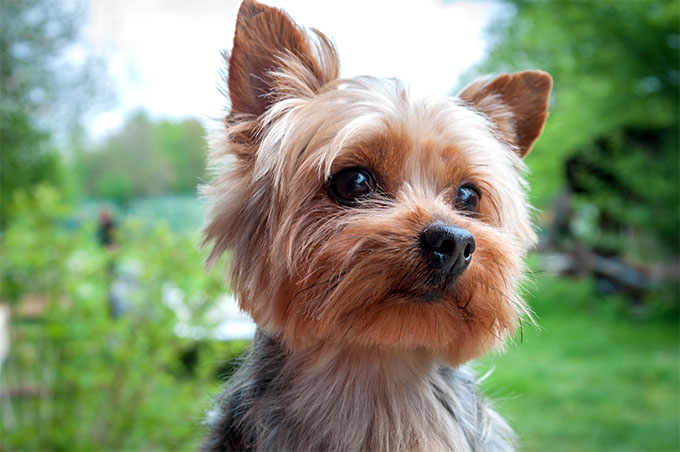

### Data loading <a name="DataLoad"></a>

In [3]:
file_list = io.loadmat('file_list.mat')['file_list']
display(file_list)

array([[array(['n02085620-Chihuahua/n02085620_10074.jpg'], dtype='<U39')],
       [array(['n02085620-Chihuahua/n02085620_10131.jpg'], dtype='<U39')],
       [array(['n02085620-Chihuahua/n02085620_10621.jpg'], dtype='<U39')],
       ...,
       [array(['n02116738-African_hunting_dog/n02116738_9829.jpg'], dtype='<U48')],
       [array(['n02116738-African_hunting_dog/n02116738_9844.jpg'], dtype='<U48')],
       [array(['n02116738-African_hunting_dog/n02116738_9924.jpg'], dtype='<U48')]],
      dtype=object)

### Total number of files  <a name="TotalFiles"></a>

In [ ]:
total_images=file_list.shape[0]
total_classes= os.listdir('Images')
print("The total number of file that exist in our images dataset are {}"\
                                                .format(total_images))
print("The total number of classes that exist in our images dataset are {}"\
                                                .format(len(total_classes)))

### Display an image <a name="DisplayImage"></a>

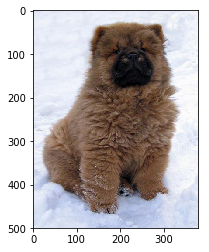

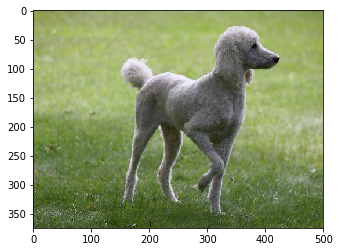

In [5]:

Images=['n02112137-chow/n02112137_10134.jpg', 
        'n02113799-standard_poodle/n02113799_448.jpg' ]

def plot_images(images):
    
    for image in images:
        demo=mpimg.imread('Images/'+image)
        imshow(demo)
        plt.show()
    
plot_images(Images)



As we can see from above pictures, pixels values vary and pictures are not of same size, so lets explore all the images and see how their sizes vary


###  Function to get file list with heigth, width and number of channels  <a name="Function"></a>

In [6]:

def get_eda(path, images_list):
    
    # create a numpy array to store height, width and number of channels
    dataset = np.ndarray(shape=(len(images_list), 3))
    dog_breed=[]
   
    image_count = 0
    # Below will loop take each image and store its features 
    for image in images_list:
        
        image_file = path+'/'+str(image[0][0])
        breed_name=str(image[0][0]).split('/')[0].split('-')[1]
        image_eda = imageio.imread(image_file)
        dog_breed.append(str(breed_name))
        dataset[image_count, 0:1] = image_eda.shape[0]
        dataset[image_count, 1:2] = image_eda.shape[1]
        dataset[image_count, 2:3] = image_eda.shape[2]
        image_count = image_count + 1

    dataset_all= pd.DataFrame(dataset,columns=('Height', 'Width','channel'))
    dataset_all.loc[:,'dog-breed'] = pd.Series(dog_breed, index=dataset_all.index)
    return dataset_all


###  Get image features and store in data frame  <a name="DataFrame"></a>

In [7]:
dataset_all= get_eda('Images',file_list)

In [8]:
display(dataset_all.head())

,Height,Width,channel,dog-breed
0,500.0,333.0,3.0,Chihuahua
1,495.0,395.0,3.0,Chihuahua
2,298.0,500.0,3.0,Chihuahua
3,500.0,345.0,3.0,Chihuahua
4,484.0,322.0,3.0,Chihuahua


###  Generate descriptive statistics  <a name="Stats"></a>

In [9]:
display(dataset_all.describe())

,Height,Width,channel
count,20580.000000,20580.000000,20580.000000
mean,385.861224,442.531876,3.000049
std,124.863446,142.792308,0.006971
min,100.000000,97.000000,3.000000
25%,333.000000,361.000000,3.000000
50%,375.000000,500.000000,3.000000
75%,453.000000,500.000000,3.000000
max,2562.000000,3264.000000,4.000000



As we can see from the above descriptive statists, the height of the images range from 100 to 2562, whereas the width of images ranges from 442 to 3264. Clearly the images sizes are equal, so we will be resizing them in coming sections. To get better understanding, distribution of height, width and channels have been plotted. 


###  Images distirbution with height, width and channels  <a name="ImageDist"></a>

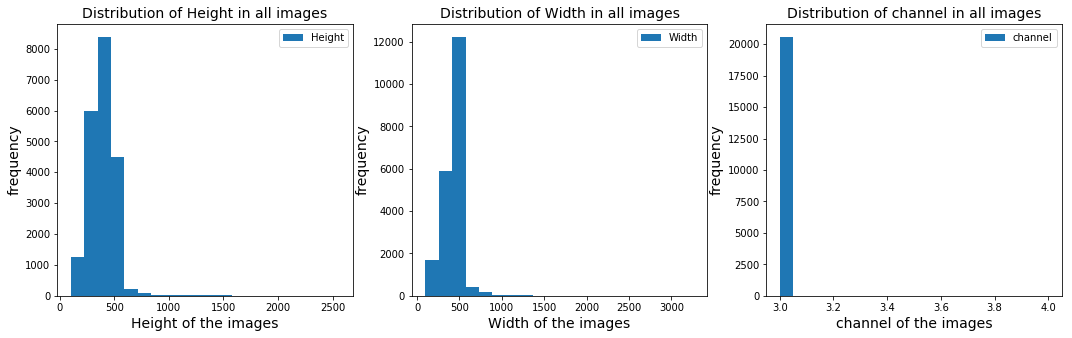

In [10]:
# Distribution of height, width and channels of all images
columns=['Height','Width','channel']
fig, ax = plt.subplots(1,3,figsize=(18,5))
for i,j in enumerate(columns):
    ax[i].hist(dataset_all[j], bins=20, label=j)
    ax[i].set_xlabel(j+' of the images',FontSize=14)
    ax[i].set_ylabel('frequency',FontSize=14)
    ax[i].set_title('Distribution of '+ j+' in all images',FontSize=14)
    ax[i].legend()



The distribution plots tells us that most of the images have height and weights ranging from 100 to 600, whereas number of channels of images are 3.


###  Count images with varying channels  <a name="CountImages"></a>

In [11]:
# To count the images with varying channels
channels_count= np.array(pd.Series(dataset_all['channel']).value_counts())
print("The number of images that have 4 channels are {} and  3 channels are {}"
      .format(channels_count[1], channels_count[0]))

The number of images that have 4 channels are 1 and  3 channels are 20579


Based on above output, all our images have 3 channels (RGB), whereas only one image have channel 4 which will be converted to channel 3 in further sections.

###  Plot number of images  <a name="PlotImages"></a>

In [ ]:
# plot the number of images that each class has

classes=pd.DataFrame(pd.Series(dataset_all['dog-breed']).value_counts())
classes.loc[:,'breed']=classes.index
sort_dataset_all = classes.sort_values(['dog-breed'])
sort_dataset_all.plot.barh(x='breed', y='dog-breed',figsize=(10,25), 
                           sort_columns='dog-breed',grid=True, legend=False, color='k')
plt.xlabel('Number of images',FontSize=13)
plt.ylabel('Breed',FontSize=13)
plt.title('Number of images that each breed has in Images dataset')
plt.show()

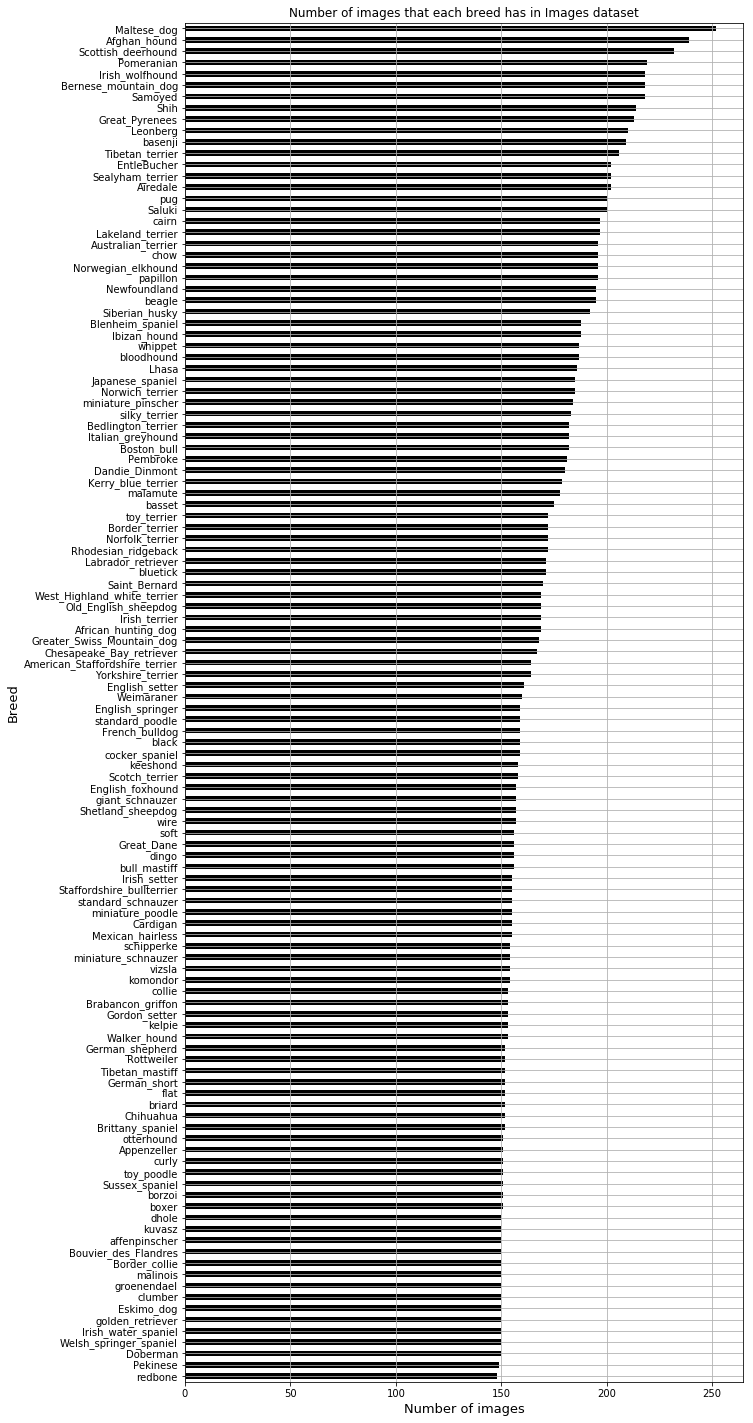

From the above plot, number of images for each class range from 150 to 252, Maltese breed has the most images and redbone breed has least number of images.

***

###  Exploratory Data Analysis Findings and Conclusions:   <a name="Conclusions"></a>











The Stanford dogs images dataset is a good source for what we are trying to accomplish in our final project. It contains a solid number of samples distributed across multiple classes. There are 20,580 samples and a total of 120 classes, on an average each class has an around 150 images. 

Out of all samples only one image has 4 channels, for that reason we have decided to convert it to 3 channels during the data cleansing phase. Furthermore, when it comes to images sizing, we noticed that image's size varied from 100 to 2562 height wise, and from 442 to 3264 width wise. Clearly, there is a huge difference in image sizes in the dataset which can be observed in distribution plots as well. One of the model's training requirement is to input feature space to be equal, hence we will resize the images to around 150 by 150 and they would have 3 channels (RGB). 

We are foreseeing training challenges in our models due to the limited number of samples that are available for each class, since we have 120 classes with on an average 150 images each. One way to overcome this issue, we would like to group multiple breeds into fewer groups (such as Irish water spaniel, Welsh springer spaniel in one family and so on). By doing so, we would be able to reduce the number of classes and also at the same time, we would have more samples for each group. 

However, even after performing data cleansing and grouping several classes and our model still cannot perform, we may try to use image recognition modules (such as GoogLeNet) for training purposes